Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Class indices:  {'NORMAL': 0, 'PNEUMONIA': 1}


C:\Users\Adil\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\Adil\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.7572 - loss: 0.5888 - val_accuracy: 0.6875 - val_loss: 0.6291
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 502ms/step - accuracy: 0.8631 - loss: 0.3282 - val_accuracy: 0.8125 - val_loss: 0.5219
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 477ms/step - accuracy: 0.8608 - loss: 0.3366 - val_accuracy: 0.8125 - val_loss: 0.3653
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 486ms/step - accuracy: 0.8867 - loss: 0.2712 - val_accuracy: 0.6250 - val_loss: 0.9349
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 540ms/step - accuracy: 0.8944 - loss: 0.2427 - val_accuracy: 0.6875 - val_loss: 0.4900
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 434ms/step - accuracy: 0.8310 - loss: 0.4737
Test Accuracy: 0.875


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 67, 67, 64)     │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 33, 33, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    14,746,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,617,352 (170.20 MB)

 Trainable params: 14,872,450 (56.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,744,902 (113.47 MB)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step


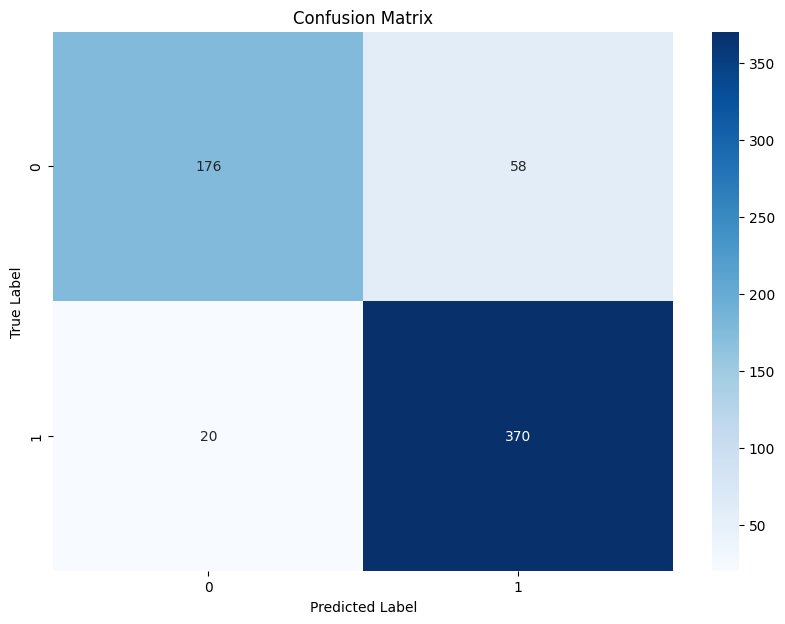

Precision: 0.877038432195308
Recall: 0.875
F1-Score: 0.8723801671689315
              precision    recall  f1-score   support

      NORMAL       0.90      0.75      0.82       234
   PNEUMONIA       0.86      0.95      0.90       390

    accuracy                           0.88       624
   macro avg       0.88      0.85      0.86       624
weighted avg       0.88      0.88      0.87       624



In [1]:
import numpy as np
import pandas as pb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import os

# Directories
test_data_dir = 'D:\\python\\chest_xray\\test'
train_data_dir = 'D:\\python\\chest_xray\\train'
validation_data_dir = 'D:\\python\\chest_xray\\val'

# Define batch size and image dimensions
batch_size = 32
img_height = 150
img_width = 150

# Train Data Generator: Augmentations for training
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0, 1]
    shear_range=0.3,          # Apply random shear transformations
    zoom_range=0.4,           # Apply random zoom
    horizontal_flip=True      # Randomly flip images horizontally
)

# Validation Data Generator: No augmentation, only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# Test Data Generator: No augmentation, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Train data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),  # Resize images to target size
    batch_size=batch_size,
    class_mode='categorical'  # Assuming you have multiple classes
)

# Validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming multi-class classification
    shuffle=False  # No need to shuffle test data
)

# Print class indices for verification
print("Class indices: ", train_generator.class_indices)

# Define the CNN Model
model = Sequential([
    Conv2D(16, (5, 5), activation='relu', input_shape=(150,150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (7, 7), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Since you have multiple classes
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,  # Adjust based on needs
    validation_data=validation_generator
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Print a summary of the model
model.summary()

# ------------------[Evaluation Metrics Added Below]------------------

# Get the predictions from the model
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# True labels from the test generator
y_true = test_generator.classes  # True class labels

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Classification Report for more details
report = classification_report(y_true, y_pred_classes, target_names=list(train_generator.class_indices.keys()))
print(report)

# ------------------[End of Evaluation Metrics Section]------------------

